# Just me generating some fake data to play with while I wait for the real data

In [7]:
import pandas as pd
import numpy as np
import itertools

types = ["sc", "2ng", "0.2ng", "bulk"]
intensities = ["none", "low", "med", "high"]
sectors = range(1,4)

data = list(itertools.product(types, intensities, sectors))

df = pd.DataFrame(data = data, columns=["type","intensity","sector"])
df["counts"] = np.random.rand(df.shape[0])
df

,type,intensity,sector,counts
0,sc,none,1,0.252538
1,sc,none,2,0.587930
2,sc,none,3,0.983748
3,sc,low,1,0.706583
4,sc,low,2,0.435348
5,sc,low,3,0.447784
6,sc,med,1,0.099178
7,sc,med,2,0.320653
8,sc,med,3,0.254118
9,sc,high,1,0.359385


# Hey Robert! Use this code to generate figure 3!
(Install seaborn if you don't have it yet)
It is expecting that a dataframe is given which contains four columns:

`type` - One of `sc`, `2ng`, `0.2ng`, `bulk`

`intensity` - `none` to `high`

`sector` - `1` to `3`

`counts` - Float in $[0,1]$

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_figure(df, output_file="fig3.pdf"):
    data = df.copy()
    data["sector/intensity"] = df["sector"].astype(str) + "/" + df["intensity"]

    # Make the plot
    fig, ax = plt.subplots(1,1, figsize=(12,4))

    sns.barplot(ax=ax, x="sector/intensity", y="counts", hue="type", ci=None, data=data)

    width = .1
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - width

        # we change the bar width
        patch.set_width(width)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
    
    ax.set_xlabel("Sector/Intensity")
    ax.set_ylabel("Proportion of Counts")

    plt.savefig(output_file)
    plt.show()
    

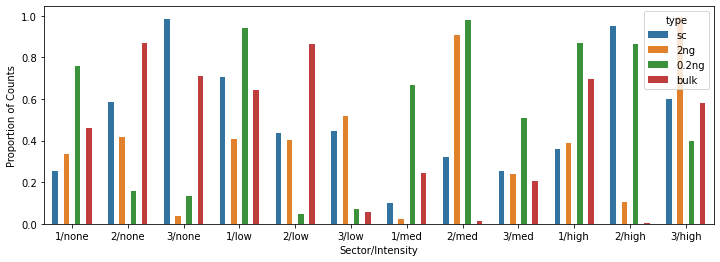

In [23]:
make_figure(df)